<a href="https://colab.research.google.com/github/Kaua-Rbs/Deep-Learning-From-A-To-Z-With-Pytorch-And-Python/blob/main/Project_6_Multiclass_Classification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Multiclass Classification - Iris Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
torch.__version__

'2.3.0+cu121'

## Database

In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [4]:
base = pd.read_csv('iris.csv')

In [5]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='class', ylabel='count'>

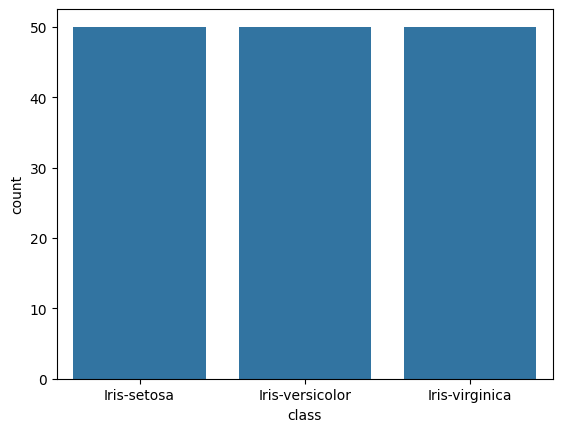

In [15]:
sns.countplot(x='class', data=base)

In [16]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [17]:
previsores.shape

(150, 4)

In [18]:
classe.shape

(150,)

In [19]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [21]:
np.unique(classe)

array([0, 1, 2])

In [22]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size=0.25)

In [23]:
previsores_treinamento.shape

(112, 4)

In [24]:
classe_treinamento.shape

(112,)

In [25]:
previsores_teste.shape

(38, 4)

In [26]:
classe_teste.shape

(38,)

In [27]:
type(previsores_treinamento)

numpy.ndarray

In [28]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype=torch.long)

In [29]:
type(previsores_treinamento)

torch.Tensor

In [30]:
type(classe_treinamento)

torch.Tensor

## Model Structuring

In [31]:
classificador = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classificador.parameters(), lr = 0.001,
                       weight_decay = 0.0001)

In [33]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle=True)

## Model Training

In [56]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad()

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optimizer.step()

    running_loss += loss.item()

  print('época %3d: perda %.5f - accuracy %.5f' % (epoch + 1, running_loss/len(train_loader),
        running_accuracy/len(train_loader)))

<ipython-input-56-17ce693153c9>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


época   1: perda 1.09708 - accuracy 0.35000
época   2: perda 1.09447 - accuracy 0.38333
época   3: perda 1.09962 - accuracy 0.35000
época   4: perda 1.09440 - accuracy 0.38333
época   5: perda 1.09175 - accuracy 0.38333
época   6: perda 1.09721 - accuracy 0.35000
época   7: perda 1.09950 - accuracy 0.35000
época   8: perda 1.09669 - accuracy 0.35000
época   9: perda 1.10237 - accuracy 0.35000
época  10: perda 1.09663 - accuracy 0.35000
época  11: perda 1.09180 - accuracy 0.38333
época  12: perda 1.08716 - accuracy 0.41667
época  13: perda 1.09166 - accuracy 0.38333
época  14: perda 1.09461 - accuracy 0.38333
época  15: perda 1.09166 - accuracy 0.38333
época  16: perda 1.09939 - accuracy 0.35000
época  17: perda 1.09172 - accuracy 0.38333
época  18: perda 1.08690 - accuracy 0.41667
época  19: perda 1.09451 - accuracy 0.38333
época  20: perda 1.09449 - accuracy 0.38333
época  21: perda 1.09444 - accuracy 0.38333
época  22: perda 1.10224 - accuracy 0.35000
época  23: perda 1.08672 - accur

## Model Evaluation

In [57]:
classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [50]:
type(previsores_teste)

torch.Tensor

In [58]:
previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)

<ipython-input-58-1bb836c66348>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)


In [59]:
previsoes = classificador(previsores_teste)

In [60]:
previsoes

tensor([[-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
        [-0.0200,  0.1857,  0.0140],
 

In [61]:
F.softmax(previsoes)

<ipython-input-61-df2270a8c9c4>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(previsoes)


tensor([[0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.3065, 0.3764, 0.3171],
        [0.306

In [62]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]

In [63]:
previsoes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [64]:
matriz = confusion_matrix(previsoes, classe_teste)
matriz

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

<Axes: >

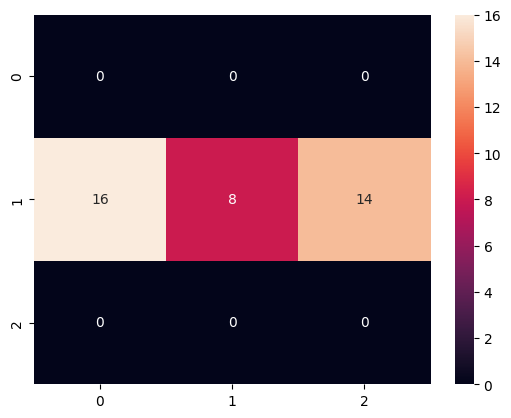

In [65]:
sns.heatmap(matriz, annot=True)